In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

NameError: name 'x' is not defined

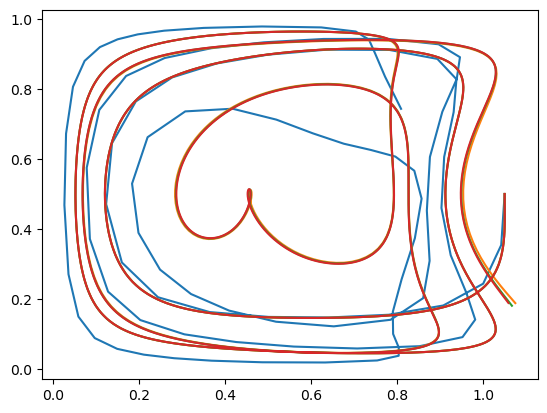

In [2]:
# Heuns method
def heun(x0, y0, t0, tf, f, Nmax=100):
    xs = [x0]
    ys = [y0]
    ts = [t0]
    dt = (tf - t0) / Nmax
    
    while ts[-1] < tf:
        x,y, t = xs[-1],ys[-1],ts[-1]
        k0_x, k0_y = f(x, y, t)
        k1_x, k1_y  = f(x + dt * k0_x, y + dt*k0_y, t + dt)
        
        xs.append(x + 0.5 * dt * (k0_x + k1_x))
        ys.append(y + 0.5 * dt * (k0_y + k1_y))
        ts.append(t + dt)
    return np.array(xs), np.array(ys), np.array(ts)


def func(x, t):
    eps, w = 0.25, 1
    a = eps * np.sin(w * t)
    b = 1 - 2 * eps * np.sin(w * t)
    dy_dx = 2 * a * x + b
    y = a * x**2 + b * x
    return y, dy_dx

def velocity(x, y, t):
    A = 0.1
    f, df = func(x, t)
    vx = -np.pi * A * np.sin(np.pi * f) * np.cos(np.pi * y)
    vy = np.pi * A * np.cos(np.pi * f) * np.sin(np.pi * y) * df
    return vx, vy



ti, tf = 0, 50
x0, y0 = np.array([1.05, 0.50])

for N in [100, 500, 1000, 10000]:
    xs, ys, ts = heun(x0, y0, ti, tf, velocity, N)
    plt.plot(xs, ys, label ='{}'.format((tf - ti) / N))
    
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.grid()
plt.show()



### 1.a 
- We will first consider a single particle starting from an initial position $x0 = [1.05, 0.5]$. Let the trajectory, $x(t)$, of the particle be controlled by Eqs. (3) and (4). Calculate the trajectory for the time interval $t \in [0, 50]$, using **Heun’s method.**
- Try a few different timesteps, and compare the results by plotting the trajectories for different timesteps in the same plot. Make up your mind about what seems a reasonably short timestep. What happens if you double the integration time, such that $t \in [0, 100]$, is the same timestep still a good choice?

In [ ]:
from module.trajectory import Trajectory

# Oppgave 1a
traj = Trajectory()
traj.oppgave_1a()

In [ ]:
# Oppgave 1b
traj1b = Trajectory()

run_times = []

Np = 100
ti, tf = 0, 100

# Initialize particles here,
x0_grid, y0_grid = np.meshgrid(np.linspace(1e-3, 0.1, int(Np/10)), np.linspace(1e-3, 0.1, int(Np/10))),


y0_list = y0_grid.flatten()
x0_list = x0_grid.flatten()

x_list = []
y_list = []
t_list = []

for x0, y0 in zip(x0_list, y0_list):
    xs, ys, ts = heun(x0, y0, ti, tf, velocity, Nmax = 1000)
    x_list.append(xs)
    y_list.append(ys)
    t_list.append(ts)



ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:


# List to store run times
run_times = []

# List of different numbers of particles
Np_values = [1, 10, 100]
ti, tf = 0, 10

for Np in Np_values:
    # Initialize particles here
    
    x0_grid, y0_grid = np.meshgrid(np.linspace(1e-3, 0.1, Np), np.linspace(1e-3, 0.1, Np))

    # Flatten the grid to get a list of initial conditions
    y0_list = y0_grid.flatten()
    x0_list = x0_grid.flatten()
    
    start_time = time.time()
    
    for x0, y0 in zip(x0_list, y0_list):
        _, _, _ = heun(x0, y0, ti, tf, velocity, Nmax = 1000)
        
    end_time = time.time()
    run_time = end_time - start_time
    run_times.append(run_time)

# Plot run time as a function of Np
plt.plot(Np_values, run_times, marker='o')
plt.xlabel('Number of particles (Np)')
plt.ylabel('Run time (seconds)')
plt.title('Run time of Heun\'s method for different Np')
plt.grid(True)
plt.show()